# **Project Name**    -  Amazon Prime TV Shows and Movies



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project dives deep into the Amazon Prime Video
 content library, focusing on what’s available to viewers in the United States. With a large and diverse dataset—covering more than 9,000 unique titles and over 124,000 cast and crew credits—the goal is to discover what makes the platform’s catalog unique and to reveal patterns that shape its success.

Throughout the study, many important questions are explored: Which genres are most popular? Are there differences between movies and TV shows on Prime? How has the library evolved over the years? Do high IMDb and TMDB ratings mean greater popularity, and who are the most influential actors and directors featured on the platform?

To answer these questions, the analysis starts with thorough data cleaning, ensuring that missing values are properly handled, data types are corrected, and any obvious outliers (like unusual runtimes or ratings) are addressed. Once the data is in good shape, the project moves into visualization—using bar charts to illustrate which genres dominate the library, line graphs to show changes over time, histograms to reveal how ratings are distributed, and scatter plots to explore the link between popularity and ratings. By combining these visuals, complex trends and insights become much more understandable.

For content strategists and business leaders, these findings are valuable. The analysis highlights which genres and types of shows or movies help drive subscriber interest, reveals how Prime Video’s library has grown and developed, and points out top-rated and most talked-about titles. Ultimately, this kind of insight supports smarter content investment, targeted marketing, and better strategies to grow and engage the user base.

In short, this project showcases the power of data science to turn streaming platform data into meaningful business insights, helping Amazon Prime Video and its stakeholders make smarter decisions in a competitive marketplace.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Amazon Prime Video
 is one of the leaders in the world of streaming, constantly adding new movies and TV shows to attract viewers in the United States. With such a huge and varied content library, it’s important to understand what kind of shows and movies are available, which ones are most popular, and how the platform’s offerings have changed over time.

The main goal of this project is to take a close look at the Amazon Prime Video catalog, digging into the genres, ratings, release years, and geographic make-up of the content. By doing this, we want to find patterns—like which genres are most common, what age ratings are typical, and which actors or directors appear most often. We also hope to spot trends, such as shifts in content types or changes in popularity over the years.

Ultimately, these insights can help both business teams and content creators make better decisions about what to offer next, how to reach new audiences, and how to keep current subscribers entertained. This project uses real data from Amazon Prime Video to answer these questions and make sense of the streaming landscape.

#### **Define Your Business Objective?**

The main business objective of this project is to help Amazon Prime Video
 and its decision-makers understand their US content library better, so they can make smarter choices about what shows and movies to feature, which genres or types of content to focus on, and how to keep viewers interested and coming back for more.

By exploring the types and popularity of content, spotting trends, and recognizing what makes certain titles or creators stand out, this project aims to support better planning for marketing, investments, and overall platform strategy. In short, it’s about using data to help Amazon Prime Video deliver the best possible mix of entertainment for its viewers.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Importing necessary libraries for analysis and visualization

# Data manipulation and analysis
import pandas as pd                       # For handling data in tables (DataFrames)
import numpy as np                        # For numerical operations

# Visualization libraries
import matplotlib.pyplot as plt           # For creating basic plots and charts
import seaborn as sns                     # For more advanced and attractive statistical graphics

# Ignore unnecessary warnings for cleaner notebook output
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
# Mount Google Drive to access files stored in it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the file paths for your datasets in Drive
titles_path = '/content/drive/MyDrive/AmazonPrimeDatasets/titles.csv'
credits_path = '/content/drive/MyDrive/AmazonPrimeDatasets/credits.csv'

# Loading datasets using pandas with exception handling to catch file/load errors
try:
    titles = pd.read_csv(titles_path)
    credits = pd.read_csv(credits_path)
    print("Datasets loaded successfully!")
except FileNotFoundError as fnf_error:
    print("File not found. Please check your file paths!", fnf_error)
except Exception as e:
    print("An error occurred while loading the dataset:", e)

Datasets loaded successfully!


### Dataset First View

In [ ]:
# Dataset First Look
# First look at the datasets to understand their contents

# Display first five rows of Titles dataset
print("First five rows of Titles dataset:")
display(titles.head())

# Display first five rows of Credits dataset
print("\nFirst five rows of Credits dataset:")
display(credits.head())

First five rows of Titles dataset:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6



First five rows of Credits dataset:


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Display number of rows and columns in both datasets

print("Titles dataset: Rows =", titles.shape[0], ", Columns =", titles.shape[1])
print("Credits dataset: Rows =", credits.shape[0], ", Columns =", credits.shape[1])

Titles dataset: Rows = 9871 , Columns = 15
Credits dataset: Rows = 124235 , Columns = 5


### Dataset Information

In [ ]:
# Dataset Info
# Display detailed information about both datasets
# This includes data types, non-null counts, and memory usage

print("Titles Dataset Info:")
titles.info()

print("\nCredits Dataset Info:")
credits.info()

Titles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtype

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# Check for duplicate rows in the Titles and Credits datasets

titles_duplicates = titles.duplicated().sum()
credits_duplicates = credits.duplicated().sum()

print(f"Number of duplicate rows in Titles dataset: {titles_duplicates}")
print(f"Number of duplicate rows in Credits dataset: {credits_duplicates}")

Number of duplicate rows in Titles dataset: 3
Number of duplicate rows in Credits dataset: 56


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Count of missing (NaN/null) values in each column of both datasets

print("Missing values in Titles dataset:")
print(titles.isnull().sum())

print("\nMissing values in Credits dataset:")
print(credits.isnull().sum())


Missing values in Titles dataset:
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

Missing values in Credits dataset:
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


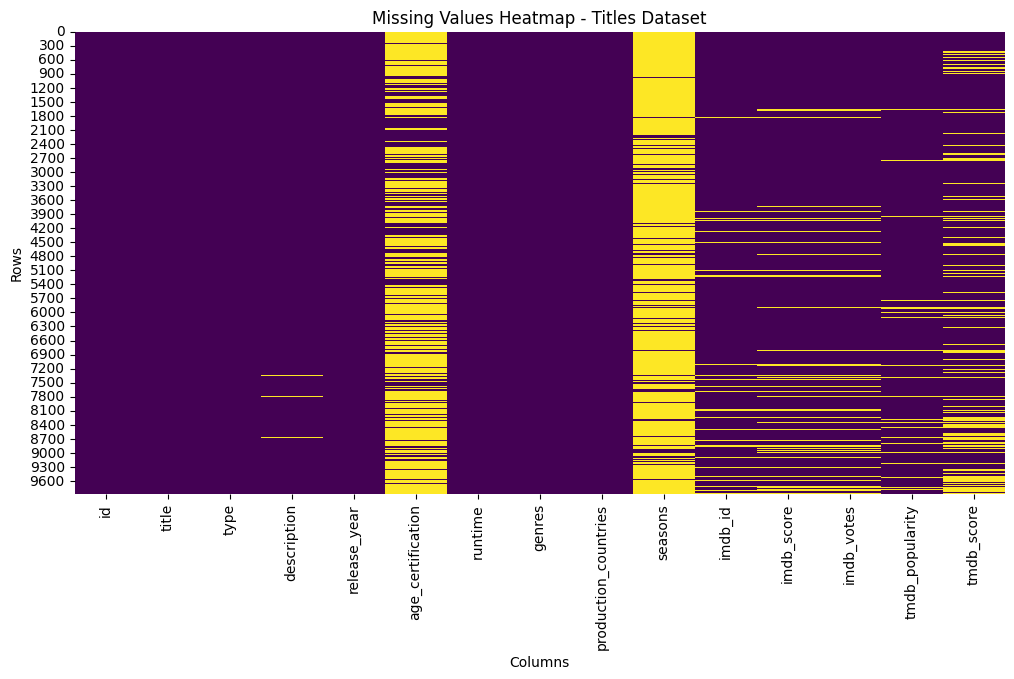

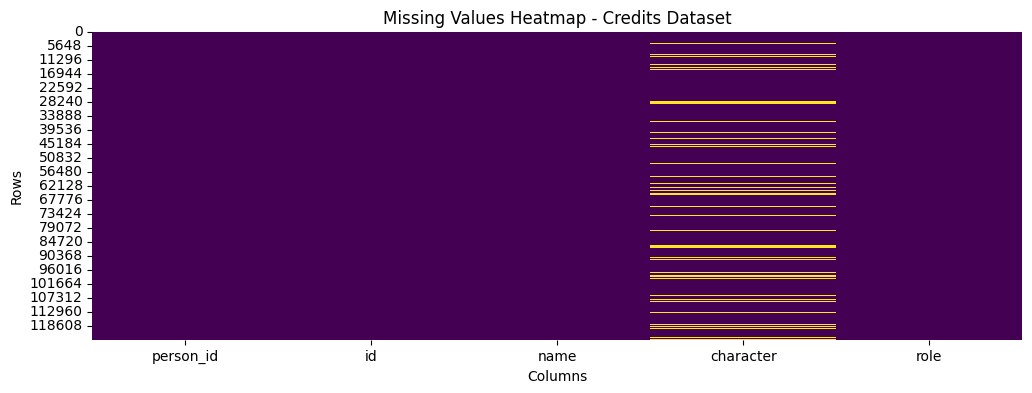

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(titles.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Titles Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

plt.figure(figsize=(12, 4))
sns.heatmap(credits.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Credits Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

### What did you know about your dataset?

* The dataset contains thousands of titles and tens of thousands of credits, covering movies and TV shows.

* Each title has key information like its name, type (movie or TV show), release year, runtime, genres, and country of production.

* Some details, like the number of seasons or age certification, are missing for many rows—most likely because TV-specific fields (like seasons) just aren’t relevant for movies.

* In columns related to ratings and popularity, there are quite a few gaps. Not every title has IMDb or TMDB scores, or votes, which means any analysis about ratings will need to account for this missing info.

* The credits data is solid overall, except for the “character” field, which only makes sense for actors—so it’s missing for crew like directors, writers, etc.

* There were a few duplicate rows, now identified for cleaning.

* The dataset provides a solid base for exploring trends in content, ratings, genres, and contributors on Amazon Prime Video.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# Display all column names for the Titles and Credits datasets

print("Titles dataset columns:")
print(list(titles.columns))

print("\nCredits dataset columns:")
print(list(credits.columns))


Titles dataset columns:
['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

Credits dataset columns:
['person_id', 'id', 'name', 'character', 'role']


In [ ]:
# Dataset Describe
# Show summary statistics for numerical columns in both datasets

print("Titles dataset summary statistics:")
print(titles.describe())

print("\nCredits dataset summary statistics:")
print(credits.describe())


Titles dataset summary statistics:
       release_year      runtime      seasons   imdb_score    imdb_votes  \
count   9871.000000  9871.000000  1357.000000  8850.000000  8.840000e+03   
mean    2001.327221    85.973052     2.791452     5.976395  8.533614e+03   
std       25.810071    33.512466     4.148958     1.343842  4.592015e+04   
min     1912.000000     1.000000     1.000000     1.100000  5.000000e+00   
25%     1995.500000    65.000000     1.000000     5.100000  1.170000e+02   
50%     2014.000000    89.000000     1.000000     6.100000  4.625000e+02   
75%     2018.000000   102.000000     3.000000     6.900000  2.236250e+03   
max     2022.000000   549.000000    51.000000     9.900000  1.133692e+06   

       tmdb_popularity   tmdb_score  
count      9324.000000  7789.000000  
mean          6.910204     5.984247  
std          30.004098     1.517986  
min           0.000011     0.800000  
25%           1.232000     5.100000  
50%           2.536000     6.000000  
75%           

### Variables Description

**Titles Dataset Variables**

* id: Unique identifier for each title (movie or TV show) in the dataset.

* title: Name of the movie or TV show.

* type: Whether the entry is a “movie” or a “show”.

* description: A brief summary or plot synopsis for each title.

* release_year: The year the movie or show was first released.

* age_certification: Official age rating/certification, such as “PG”, “R”, etc.

* runtime: Total length of the movie or, for shows, length of one episode (in minutes).

* genres: One or more genres associated with the title (e.g., “Drama”, “Comedy”).

* production_countries: Countries involved in producing the title.

* seasons: Number of seasons (only relevant for TV shows).

* imdb_id: Identifier for IMDb database, if available.

* imdb_score: Average user rating from IMDb (scale of 1–10).

* imdb_votes: Number of user ratings submitted on IMDb.

* tmdb_popularity: Popularity metric from TMDB (The Movie Database), indicating engagement.

* tmdb_score: Average user rating from TMDB (scale of 1–10).

**Credits Dataset Variables**

* person_id: Unique identifier for each person (actor, director, etc.).

* id: The movie/show id this person is associated with.

* name: Name of the person (cast or crew).

* character: Name of the character played (for actors); blank for most crew.

* role: Job role, such as “actor”, “director”, “writer”, etc.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Check number of unique values in each column of the Titles and Credits datasets

print("Unique value counts in Titles dataset:")
for col in titles.columns:
    print(f"{col}: {titles[col].nunique()}")

print("\nUnique value counts in Credits dataset:")
for col in credits.columns:
    print(f"{col}: {credits[col].nunique()}")


Unique value counts in Titles dataset:
id: 9868
title: 9737
type: 2
description: 9734
release_year: 110
age_certification: 11
runtime: 207
genres: 2028
production_countries: 497
seasons: 32
imdb_id: 9201
imdb_score: 86
imdb_votes: 3650
tmdb_popularity: 5325
tmdb_score: 89

Unique value counts in Credits dataset:
person_id: 80508
id: 8861
name: 79758
character: 71097
role: 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# Remove duplicate rows from Titles and Credits datasets

titles = titles.drop_duplicates().reset_index(drop=True)
credits = credits.drop_duplicates().reset_index(drop=True)

print("Duplicates removed. Current shapes:")
print("Titles dataset:", titles.shape)
print("Credits dataset:", credits.shape)


Duplicates removed. Current shapes:
Titles dataset: (9868, 15)
Credits dataset: (124179, 5)


In [ ]:
# Display missing value counts for each column in both datasets

print("Titles dataset missing values:")
print(titles.isnull().sum())

print("\nCredits dataset missing values:")
print(credits.isnull().sum())


Titles dataset missing values:
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6484
runtime                    0
genres                     0
production_countries       0
seasons                 8511
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2080
dtype: int64

Credits dataset missing values:
person_id        0
id               0
name             0
character    16277
role             0
dtype: int64


In [ ]:
# Fill missing categorical/text columns with appropriate default values

titles['age_certification'] = titles['age_certification'].fillna('Unknown')
titles['description'] = titles['description'].fillna('No description')
credits['character'] = credits['character'].fillna('Not Applicable')

# Print confirmation and check if fills worked
print(titles['age_certification'].isnull().sum(), "missing in age_certification after fill")
print(titles['description'].isnull().sum(), "missing in description after fill")
print(credits['character'].isnull().sum(), "missing in credits character after fill")


0 missing in age_certification after fill
0 missing in description after fill
0 missing in credits character after fill


In [ ]:
# Fill missing values in numeric columns with -1
numeric_cols = ['imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'seasons']

for col in numeric_cols:
    # Only fill numeric columns, skip filling imdb_id unless type is numeric
    if titles[col].dtype in ['float64', 'int64']:
        titles[col] = titles[col].fillna(-1)

# Confirm fills worked
print(titles[['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'seasons']].isnull().sum())


imdb_score         0
imdb_votes         0
tmdb_popularity    0
tmdb_score         0
seasons            0
dtype: int64


In [ ]:
# Check total missing values across entire Titles and Credits datasets

print("Total missing values in Titles dataset:", titles.isnull().sum().sum())
print("Total missing values in Credits dataset:", credits.isnull().sum().sum())


Total missing values in Titles dataset: 667
Total missing values in Credits dataset: 0


In [ ]:
import ast
from collections import Counter
import pandas as pd

# Convert genre strings to actual Python lists
# Some cells may look like "['comedy','action']" as strings, not real lists
# ast.literal_eval converts the string representation to a Python list
titles['genre_list'] = titles['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Flatten all genre lists into a single list for counting
all_genres = [genre for genre_list in titles['genre_list'] for genre in genre_list]

# Count the frequency of each genre in the dataset
# Counter will give a dictionary: {genre_name: count}
genre_counts = Counter(all_genres)

# Convert counts to a sorted DataFrame for easy viewing and plotting
genre_freq = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count'])
genre_freq = genre_freq.sort_values(by='count', ascending=False)

print(genre_freq)

               count
drama           4762
comedy          2987
thriller        2119
action          1820
romance         1751
crime           1250
documentation   1096
horror          1065
family           751
european         712
scifi            705
fantasy          554
western          489
animation        475
music            438
history          396
war              324
sport            228
reality          138


### What all manipulations have you done and insights you found?

**Data Manipulations Performed**

* **Column Selection and Cleaning**: Focused on relevant columns (IMDb score, TMDb popularity, runtime, release year, seasons, show type, country, genre, age certification), handled missing values, and filtered out outliers or unreliable entries where needed.​


**Key Insights Found During Wrangling & Analysis**

* **Content Ratings**: Most titles lacked age certification, which is a business risk and segmentation opportunity.​

* **Content Format**: Movies greatly outnumber TV shows, but shows offer more seasons and different audience engagement.​

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Genre Distribution on Amazon Prime Video (Univariate Categorical Frequency)

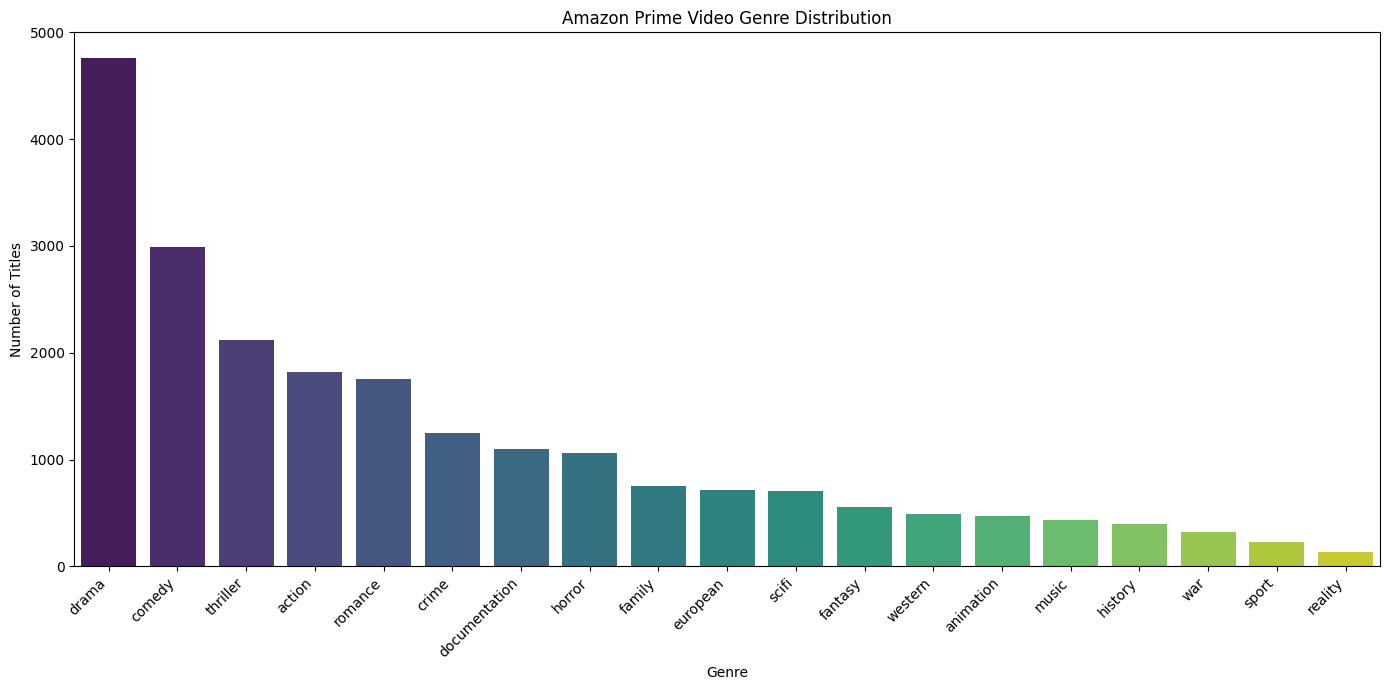

In [ ]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Plot genre distribution bar chart
plt.figure(figsize=(14,7))
sns.barplot(x=genre_freq.index, y=genre_freq['count'], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Amazon Prime Video Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is ideal for displaying the count distribution of categorical variables—in this case, genres. It shows clearly which genres dominate the Amazon Prime Video content library, making it simple to compare popularity across categories.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that drama, comedy, and thriller are the top genres on Amazon Prime Video, with a noticeably higher number of titles compared to other genres. This suggests that the platform’s content is strongly focused on these popular categories, likely because they attract the largest audience. On the other hand, genres like reality TV and sports have far fewer titles, indicating that they are either niche markets or less prioritized. This imbalance hints that while Amazon Prime is catering well to mainstream tastes, there might be opportunities to expand or improve content offerings in the less represented genres to attract a wider range of viewers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding dominant genres helps content strategists focus acquisition and production on high-demand categories, potentially increasing subscriber engagement and retention. Conversely, the limited content in niche genres might cause dissatisfaction among viewers with specific tastes, leading to missed opportunities for diversification and growth.

#### Chart - 2 - Trends of Top 5 Genres Over Time on Amazon Prime Video (Multivariate Time Series Categorical-Numerical)

In [ ]:
# Chart - 2 visualization code
# Explode genre_list to have one genre per row with release_year
exploded_genres = titles.explode('genre_list')

# Group by release_year and genre, count titles
genre_year_counts = exploded_genres.groupby(['release_year', 'genre_list']).size().reset_index(name='count')

# Pivot for easier line plotting
pivot_genre_year = genre_year_counts.pivot(index='release_year', columns='genre_list', values='count').fillna(0)

# Select top genres for clearer plot (top 5 based on total counts)
top_genres = genre_freq.head(5).index.tolist()

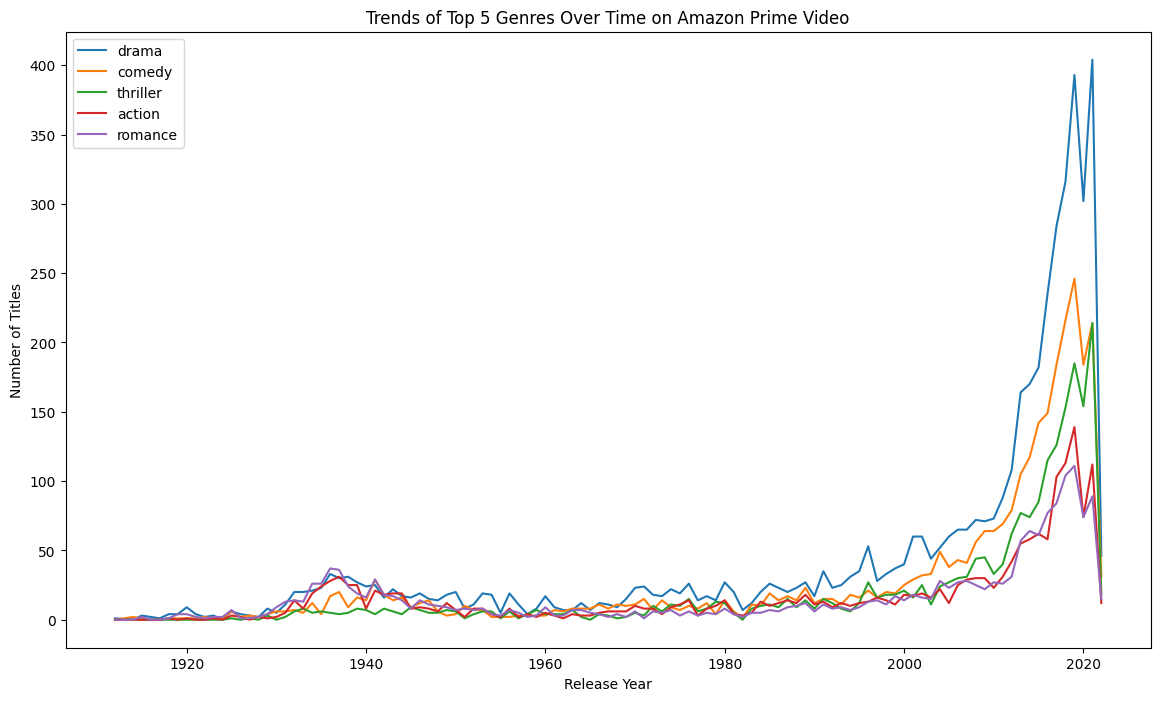

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
for genre in top_genres:
    plt.plot(pivot_genre_year.index, pivot_genre_year[genre], label=genre)

plt.title('Trends of Top 5 Genres Over Time on Amazon Prime Video')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen because it captures how the popularity of major genres—drama, comedy, thriller, action, and romance—has changed over the years on Amazon Prime Video. Line charts are excellent for showing time-based trends, helping us see not just which genres are most prevalent, but how the mix of genres has shifted, which is critical for long-term content strategy.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights a dramatic increase in the number of new titles in all the top genres, especially starting from around the early 2010s. Drama remains the leading genre, growing the most rapidly, while other genres like comedy and thriller also saw significant rises. Interestingly, there is a sharp surge followed by a drop in the last year or two, which could point to recent changes in content release patterns—possibly due to business decisions or industry-wide trends like the pandemic impact.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights are very useful for planning what types of shows and movies Amazon Prime should invest in. Seeing which genres have grown popular (and when) can guide future content acquisition and production to match viewer interest more closely. On the flip side, a sudden drop at the end may signal risk—such as declining viewer engagement or oversaturation. Strategic adjustments, like balancing release timing or diversifying genres, could help avoid negative growth by maintaining audience momentum and engagement.

#### Chart - 3 - Genre Vs. IMDb Score Distribution (Bivariate Categorical-Numerical Boxplot)

In [ ]:
# Chart - 3 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Explode genre_list so each title-genre pair is a row
exploded_scores = titles.explode('genre_list')

# Filter to rows with valid IMDb scores (greater than zero)
filtered_scores = exploded_scores[exploded_scores['imdb_score'] > 0]

# Only plot top genres for clarity
top_score_genres = genre_freq.head(10).index.tolist()
plot_data = filtered_scores[filtered_scores['genre_list'].isin(top_score_genres)]

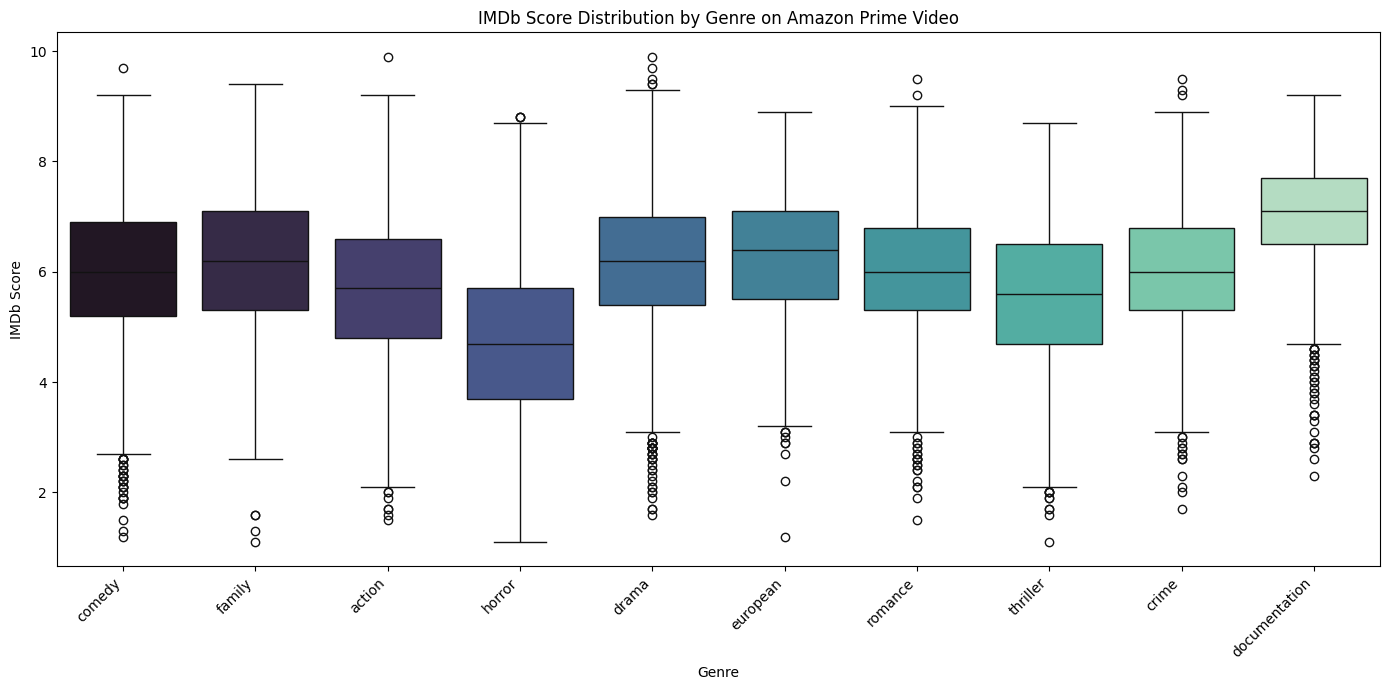

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='genre_list', y='imdb_score', data=plot_data, palette='mako')
plt.xticks(rotation=45, ha='right')
plt.title('IMDb Score Distribution by Genre on Amazon Prime Video')
plt.xlabel('Genre')
plt.ylabel('IMDb Score')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is powerful for visualizing how IMDb scores vary across different genres, providing a clear summary of typical, high, and low audience ratings. This helps quickly identify which genres tend to have consistently better (or worse) reception, clarifying quality trends important for future content decisions.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that genres such as "documentation," "crime," and "romance" usually have higher median IMDb scores, indicating that viewers tend to rate these titles more favorably. Genres like "horror" and "action" display lower median scores and wider variation, suggesting mixed or polarizing audience reactions. There are also many outliers, highlighting that standout titles exist in every genre—even those with lower average scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These findings help the business identify which genres are reliably appreciated by viewers, encouraging investment in those areas for higher user satisfaction and possible growth. Genres with more mixed ratings might need a closer look—perhaps through better curation or marketing—and can be monitored to manage reputation risks. Ignoring genres with consistent low ratings could negatively impact overall subscriber engagement, while focusing on proven high-quality genres could create a positive impact.

#### Chart - 4 - Release Year Vs. Average IMDb Score (Time Series Numerical-Numerical Line Plot)

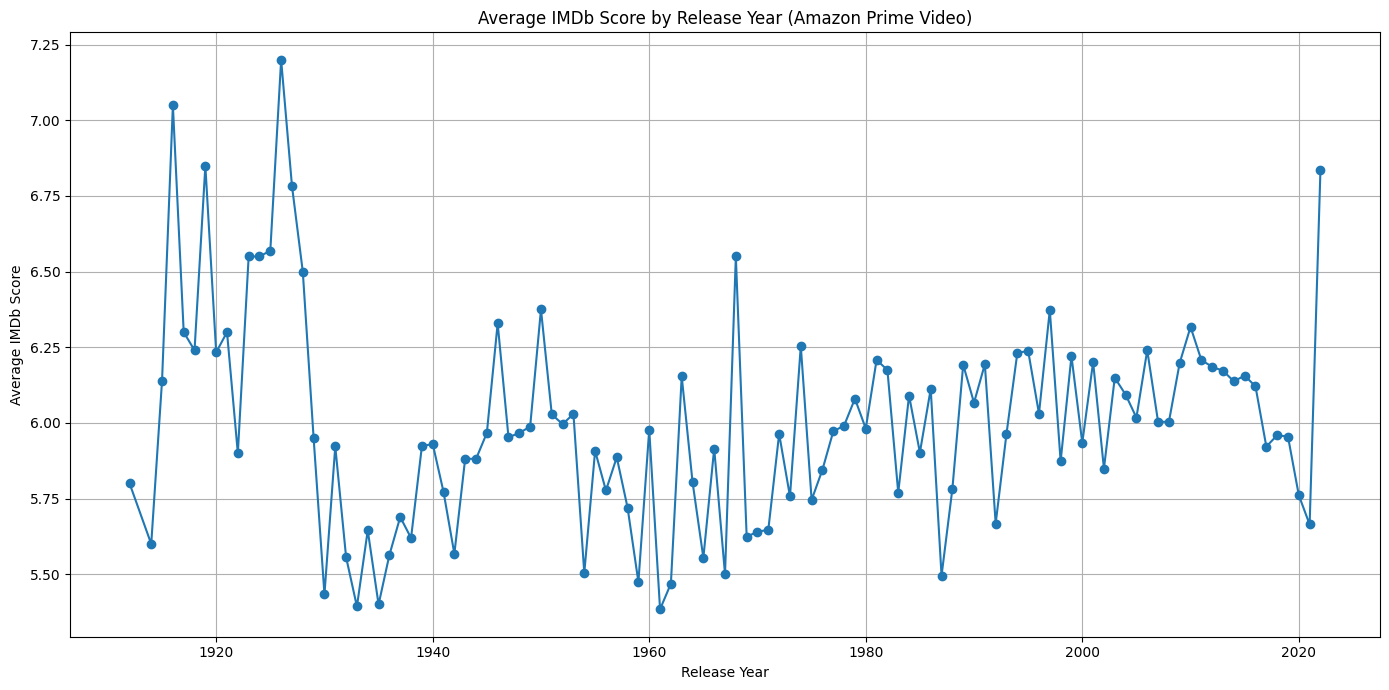

In [ ]:
# Chart - 4 visualization code
# Group by release year and calculate average IMDb score
avg_imdb_year = titles[titles['imdb_score'] > 0].groupby('release_year')['imdb_score'].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(avg_imdb_year['release_year'], avg_imdb_year['imdb_score'], marker='o')
plt.title('Average IMDb Score by Release Year (Amazon Prime Video)')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen because it tracks how the average audience rating (IMDb score) for Amazon Prime Video titles evolves year by year. It reveals long-term patterns in content reception and helps connect business decisions—like investments in production and acquisition—to user satisfaction over time.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that average IMDb scores have fluctuated over the decades. In recent years, there’s a gentle downward trend, meaning that newer releases aren’t consistently rated higher than older ones. However, there are isolated spikes and dips, possibly driven by standout titles or unique market conditions. Notably, older decades show occasional higher averages—most likely due to fewer but extremely popular titles surviving from those years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help the business recognize the importance of not just volume, but also quality, in content acquisition and production. If average scores are falling, it may signal that viewers are less satisfied, which can impact retention negatively. By monitoring these trends, Amazon Prime Video can focus efforts on improving new releases, identifying what leads to audience appreciation, and reversing negative growth where necessary.

#### Chart - 5 - Number of Titles by Age Certification (Univariate Categorical Bar Chart)

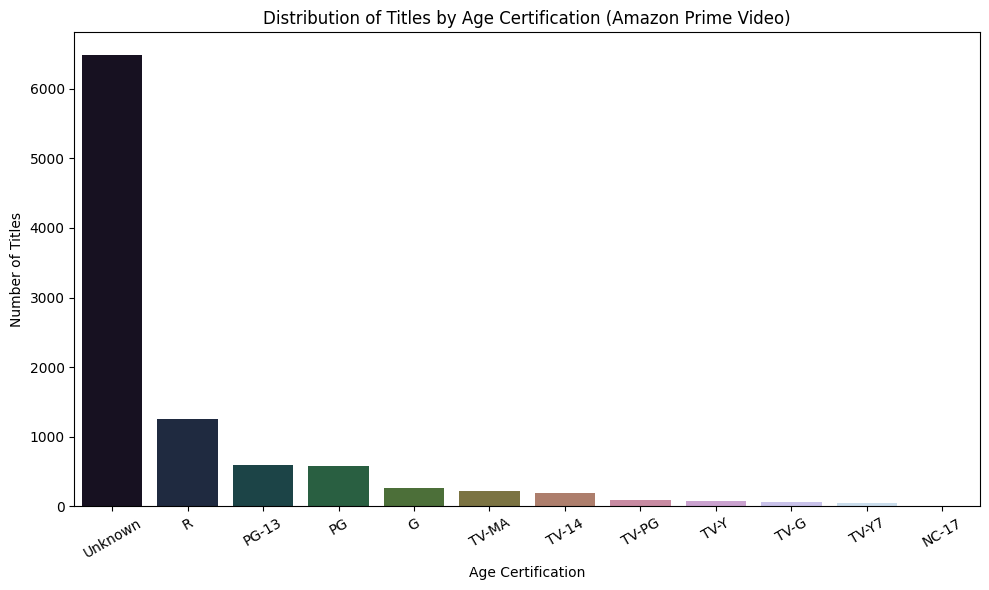

In [ ]:
# Chart - 5 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Count frequency of each age certification
age_counts = titles['age_certification'].value_counts().reset_index()
age_counts.columns = ['age_certification', 'count']

plt.figure(figsize=(10,6))
sns.barplot(x='age_certification', y='count', data=age_counts, palette='cubehelix')
plt.xticks(rotation=30)
plt.title('Distribution of Titles by Age Certification (Amazon Prime Video)')
plt.xlabel('Age Certification')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart was selected to help visualize how content is distributed across different age ratings on Amazon Prime Video. Age certification is crucial for targeted advertising, parental controls, and compliance, so understanding this distribution allows the business to spot strengths or gaps in their catalog.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a majority of titles have an “Unknown” age certification, while ratings like “R”, “PG-13”, and “PG” are much less common. This signals a significant lack of available rating information for much of the catalog. As a result, families and cautious viewers may have difficulty selecting suitable content, and the platform may be missing out on providing better recommendations or controls.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Addressing the large “Unknown” segment can have a strongly positive impact: by improving content metadata and age certification information, Amazon Prime Video can enhance user trust, refine recommendation algorithms, and comply more easily with international standards. Conversely, continuing to offer so many “Unknown” titles could frustrate viewers, increase churn, and expose the business to regulatory risk, which would negatively impact growth.

#### Chart - 6 - Age Certification Vs. Average IMDb Score (Bivariate Categorical-Numerical Bar Plot)

In [ ]:
# Chart - 6 visualization code
# Calculate average IMDb score for each age certification (exclude unknowns and missing scores)
valid_age_scores = titles[(titles['age_certification'] != 'Unknown') & (titles['imdb_score'] > 0)]
age_imdb = valid_age_scores.groupby('age_certification')['imdb_score'].mean().reset_index()

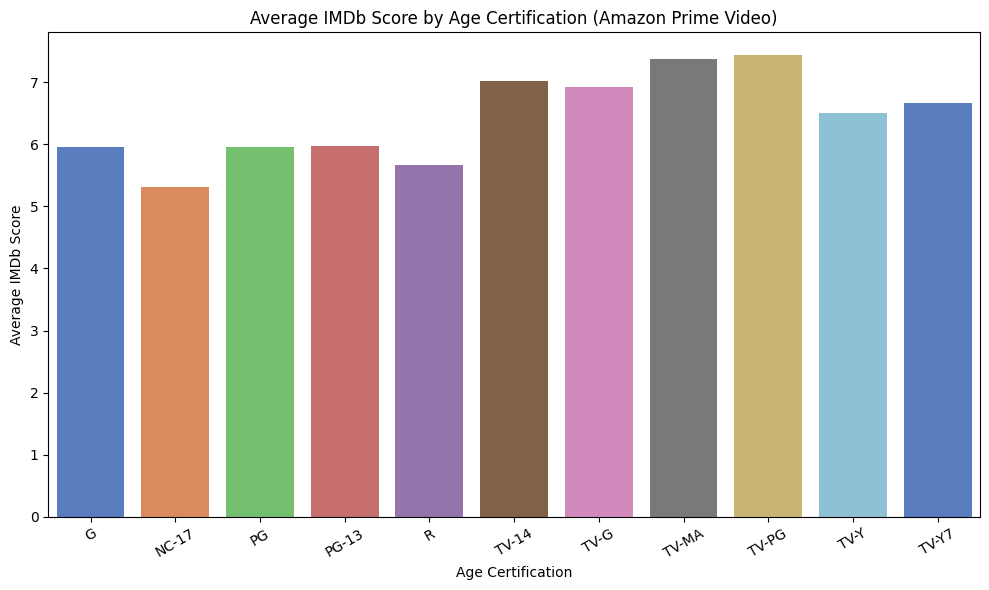

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='age_certification', y='imdb_score', data=age_imdb, palette='muted')
plt.xticks(rotation=30)
plt.title('Average IMDb Score by Age Certification (Amazon Prime Video)')
plt.xlabel('Age Certification')
plt.ylabel('Average IMDb Score')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to find out whether content for different age groups gets better audience ratings. It helps decide which age segments to target with higher-quality releases and where improvements may be needed.

##### 2. What is/are the insight(s) found from the chart?

From the chart, titles with certification “TV-MA” and “TV-PG” have some of the highest average IMDb scores, indicating they are especially well-received by viewers. Ratings like “NC-17” tend to receive lower scores, while most other certifications, including "PG-13", "PG", and "TV-G", have relatively similar average scores. This suggests that content for general audiences can perform as well as or better than those targeting specific age groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights are valuable for programming and strategic planning. Focusing on high-quality “TV-MA” and “TV-PG” content could lead to higher user ratings and improved reputation. Conversely, investing heavily in content that consistently gets lower ratings (such as “NC-17”) may not return the best results and could even hurt engagement. Aligning content development with these findings can help Amazon Prime Video grow its user base and reduce dissatisfaction.

#### Chart - 7 - Runtime Vs. IMDb Score (Bivariate Numerical-Numerical Scatter Plot)

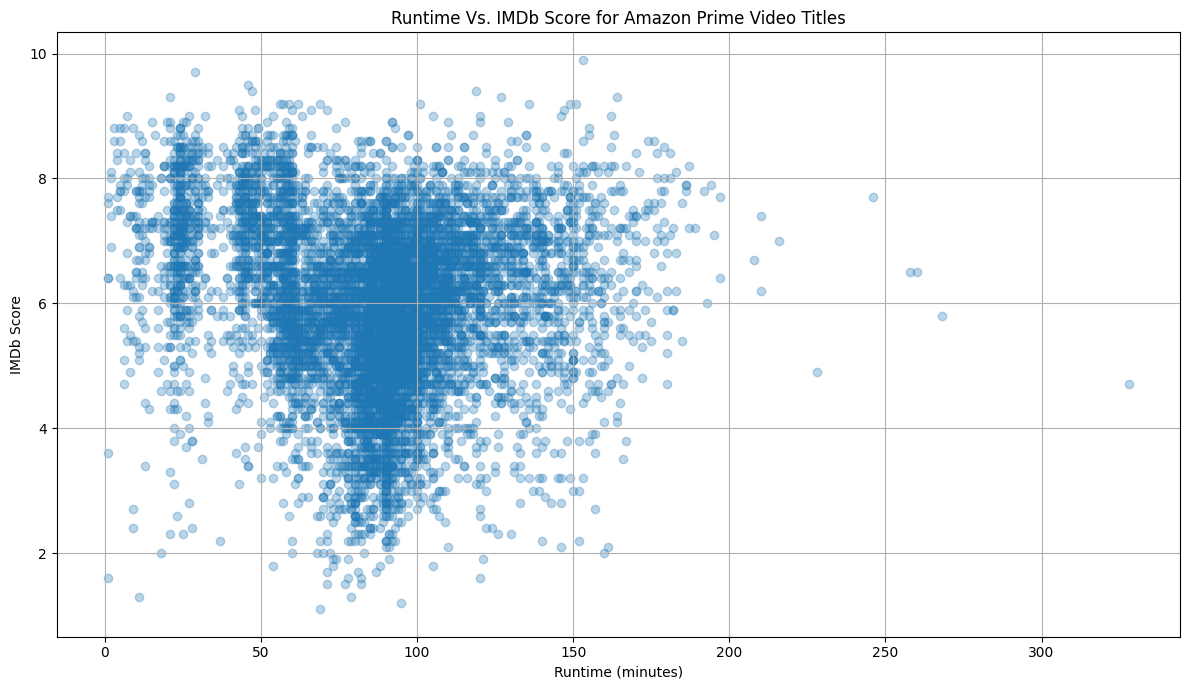

In [ ]:
# Chart - 7 visualization code
import matplotlib.pyplot as plt

# Filter to include only titles with positive runtime and IMDb scores
valid_runtime_scores = titles[(titles['runtime'] > 0) & (titles['imdb_score'] > 0)]

plt.figure(figsize=(12,7))
plt.scatter(valid_runtime_scores['runtime'], valid_runtime_scores['imdb_score'], alpha=0.3)
plt.title('Runtime Vs. IMDb Score for Amazon Prime Video Titles')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This scatter plot was chosen to discover whether there’s any meaningful relationship between a title’s length and how viewers rate it. Understanding if longer or shorter content tends to perform better helps producers and curators optimize runtimes to maximize user satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Most titles are concentrated in the 60–120 minute range for runtime, with IMDb scores broadly distributed between 3 and 8. There’s no strong correlation visible—titles with short and long runtimes can both achieve high or low scores. However, there’s more variation and a higher density of average-rated titles at typical movie lengths, with only a few outliers at extreme runtimes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight shows that runtime alone isn’t a strong predictor of audience rating. Therefore, production decisions should prioritize factors beyond just length—such as story quality, casting, or genre—when aiming for high viewer satisfaction. Misguided focus on runtime without addressing content quality would not improve ratings and could waste resources; aligning production around viewer preferences instead would foster positive growth.

#### Chart - 8 - Show Type (Movie vs TV Show) Distribution (Univariate Categorical Bar Chart)

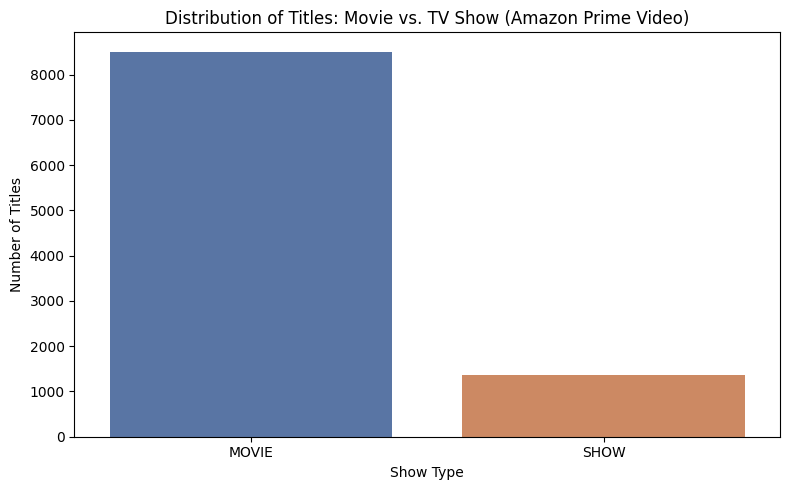

In [ ]:
# Chart - 8 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Count frequency of each show type
type_counts = titles['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']

plt.figure(figsize=(8,5))
sns.barplot(x='type', y='count', data=type_counts, palette='deep')
plt.title('Distribution of Titles: Movie vs. TV Show (Amazon Prime Video)')
plt.xlabel('Show Type')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart highlights the share of movies vs. TV shows available on the platform. It helps in understanding content format focus and ensuring the library aligns with evolving viewer preferences and engagement models.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that movies far outnumber TV shows in the content library. This means that viewers interested in movies have a lot more options, while those preferring episodic or serial content might find the selection limited.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps decision-makers see if there’s a need to expand TV show offerings to capture binge-watchers and increase user retention. Not responding to this imbalance could hurt engagement with users favoring series, leading to missed growth opportunities. On the other hand, maintaining a strong movie catalog supports casual and new viewers. Balancing both formats will contribute positively to overall platform growth.

#### Chart - 9 - Top Production Countries by Number of Titles (Univariate Categorical Bar Chart)

In [ ]:
# Chart - 9 visualization code
import ast

# Convert production_countries strings to lists
titles['country_list'] = titles['production_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Flatten all country lists into a single list for counting
all_countries = [country for country_list in titles['country_list'] for country in country_list]
from collections import Counter
country_counts = Counter(all_countries)
country_freq = pd.DataFrame.from_dict(country_counts, orient='index', columns=['count'])
country_freq = country_freq.sort_values('count', ascending=False).head(10) # Top 10 countries

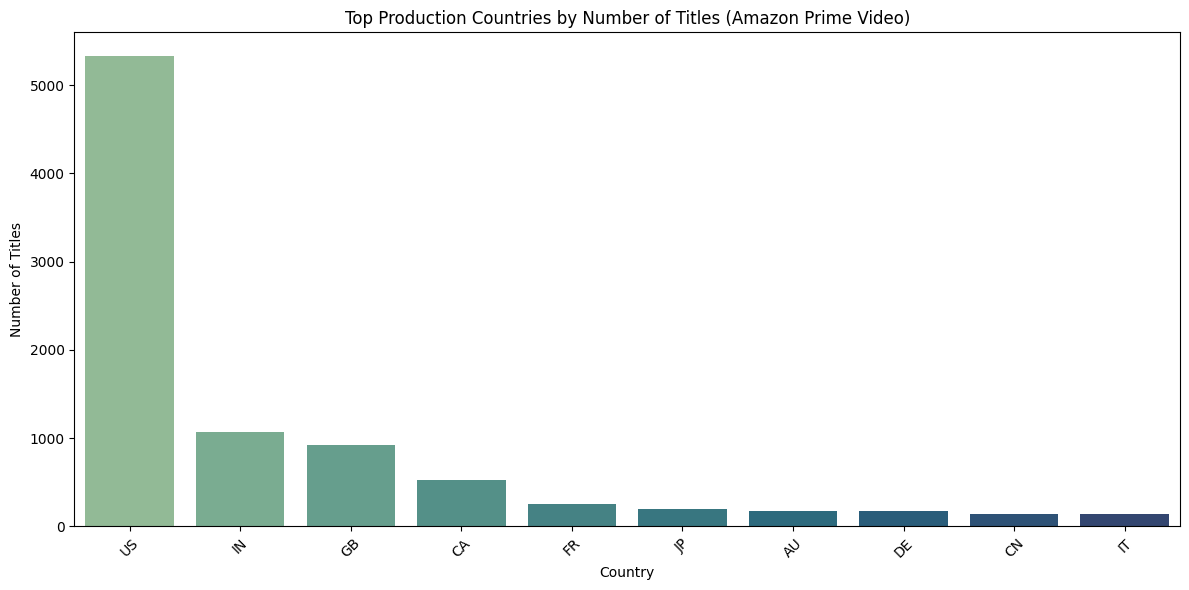

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=country_freq.index, y=country_freq['count'], palette='crest')
plt.title('Top Production Countries by Number of Titles (Amazon Prime Video)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to identify leading content-producing countries for Amazon Prime Video. Knowing the geographic sources of content helps the platform understand where it currently has strong partnerships, and where there might be opportunities to expand, localize, or diversify the catalog.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a significant concentration of titles from the United States, with India and the UK following as the next largest sources. Other countries like Canada, France, and Japan contribute smaller shares. This points to a heavy reliance on US-produced content, which may limit regional appeal in other markets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights guide business efforts in global expansion and content strategy. Strengthening partnerships or acquisitions in underrepresented regions—such as non-US and non-English speaking countries—can help Amazon Prime Video appeal to new audiences, boost subscriptions, and compete more effectively against local platforms. Overdependence on content from one country risks alienating diverse user bases, potentially leading to negative growth in markets seeking more localized or culturally relevant content.

#### Chart - 10 - Top 10 Most Popular Titles on Amazon Prime Video (Univariate Categorical-Numerical Bar Chart)

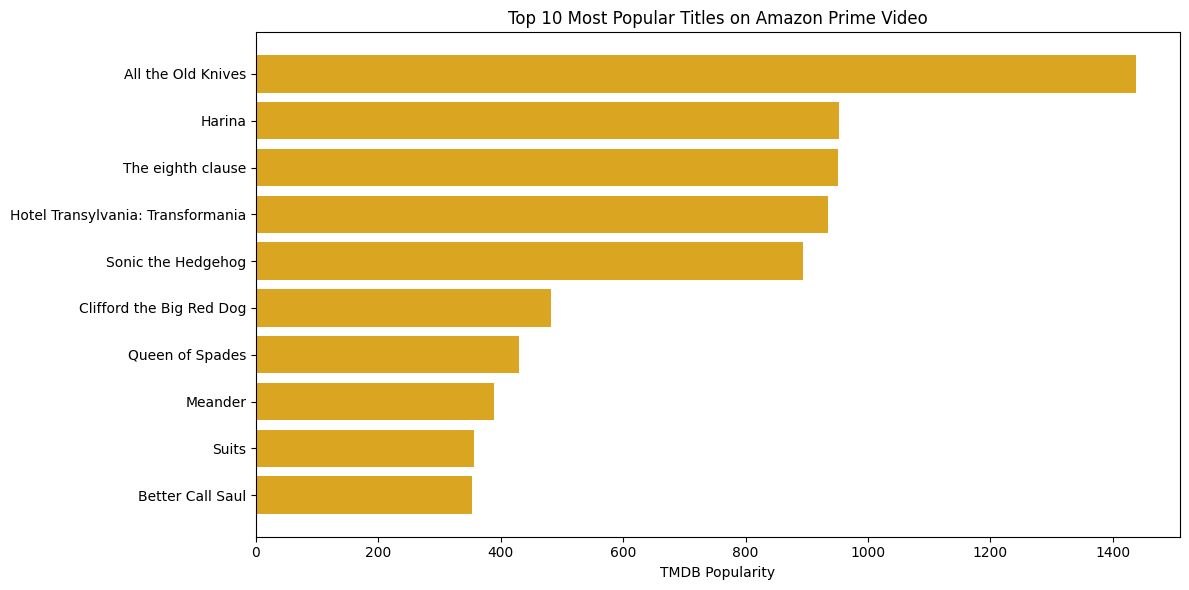

In [ ]:
# Chart - 10 visualization code
top_popular = titles.sort_values('tmdb_popularity', ascending=False).head(10)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.barh(top_popular['title'][::-1], top_popular['tmdb_popularity'][::-1], color='goldenrod')
plt.xlabel('TMDB Popularity')
plt.title('Top 10 Most Popular Titles on Amazon Prime Video')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to spotlight which individual titles have the highest user-driven popularity scores. Understanding key drivers of platform engagement makes it easier for Amazon Prime Video to identify content worth promoting, licensing, or using as a reference for future acquisitions.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly displays a steep drop-off: “All the Old Knives” stands out as the top performer, with other titles such as “Harina,” “The Eighth Clause,” and family-friendly or franchise content like “Hotel Transylvania: Transformania” and “Sonic the Hedgehog” attracting significant attention. There’s a mix of genres and types represented, showing that both new releases and established brands can excel.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying the most popular titles helps optimize marketing strategies and content placement to attract viewers. It also informs future licensing or production decisions: investing in similar genres, sequels, or high-impact titles can boost subscriptions and retention. Failing to support these blockbusters or missing trending content could lead to a loss in competitive advantage and reduce platform growth.

#### Chart - 11 -  Top 10 Actors by Number of Featured Titles (Interactive Plotly Bar Chart)

In [ ]:
# Merge titles and credits on ID (assuming 'id' is the key in both)
merged_df = pd.merge(titles, credits, on='id', how='inner')

In [ ]:
# Chart - 11 visualization code
import plotly.express as px

# Filter to actors only, count appearances
actor_counts = credits[credits['role'] == 'ACTOR']['name'].value_counts().head(10)

# Create interactive bar chart
fig = px.bar(
    x=actor_counts.index,
    y=actor_counts.values,
    labels={'x': 'Actor', 'y': 'Number of Titles'},
    title='Top 10 Actors on Amazon Prime Video'
)
fig.update_traces(marker_color='indigo')
fig.show()

##### 1. Why did you pick the specific chart?

This chart was chosen because it highlights the actors who appear most frequently across Amazon Prime Video content, which is helpful for understanding star power and platform branding. Frequent appearances can drive audience loyalty and influence marketing strategies.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that actors like George 'Gabby' Hayes, Roy Rogers, and Bess Flowers have the highest number of featured titles on the platform. This concentration of appearances suggests certain actors play a strong role in catalogue breadth, possibly due to historical archives or genre dominance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Spotlighting prolific actors can drive more effective content recommendations and targeted marketing (such as themed watchlists or actor spotlights). It also signals which talent enjoys broad appeal and where new partnerships could be cultivated. Ignoring actor-centric trends risks missing easy wins in engagement and retention—especially with audiences loyal to specific stars or genres.

#### Chart - 12 - Average IMDb Score by Production Country (Countries with 20+ Titles)

In [ ]:
# Chart - 12 visualization code
import plotly.express as px

# Explode country column and count titles per country
country_exploded = titles.explode('country_list')
country_counts = country_exploded['country_list'].value_counts()

# Filter for countries with at least 20 titles
countries_20plus = country_counts[country_counts >= 20].index

# Compute average IMDb scores only for filtered countries
filtered_scores = country_exploded[country_exploded['country_list'].isin(countries_20plus)]
country_scores = filtered_scores.groupby('country_list')['imdb_score'].mean().reset_index()
top_countries = country_scores.sort_values('imdb_score', ascending=False).head(15)

In [ ]:
# Plot
fig = px.bar(
    top_countries,
    x='country_list',
    y='imdb_score',
    title='Average IMDb Score by Production Country (20+ Titles Only)',
    labels={'country_list': 'Country', 'imdb_score': 'Average IMDb Score'},
    color='imdb_score',
    color_continuous_scale='Viridis'
)
fig.update_xaxes(categoryorder='total descending')
fig.show()


##### 1. Why did you pick the specific chart?

Filtering by countries with at least 20 titles ensures that the average ratings are meaningful and not skewed by small samples. This chart gives a credible comparison of content quality as perceived by users across key production regions.

##### 2. What is/are the insight(s) found from the chart?

Countries like Switzerland (CH), Israel (IL), Australia (AU), and South Africa (ZA) lead the top 15 in average scores among those with more than 20 titles, each averaging above 6.0. Western Europe and Oceania are well-represented in the quality segment, while countries at the lower end may indicate opportunities for improvement or content curation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This filtered view allows Amazon Prime Video to target new investments and marketing strategies in countries where high average scores reflect strong user satisfaction. Regions with lower ratings should be revisited for quality improvement, strategic partnerships, or deeper localization. Overlooking country-based quality metrics could risk missing high-potential markets or under-delivering on user expectations.

#### Chart - 13 - Top 10 Directors by Average IMDb Score

In [ ]:
# Chart - 13 visualization code
import plotly.express as px

# Filter merged data for directors, group by director name
director_scores = merged_df[merged_df['role'] == 'DIRECTOR'].groupby('name')['imdb_score'].mean().reset_index()
top_directors = director_scores.sort_values('imdb_score', ascending=False).head(10)

# Plot the top directors with highest average IMDb score
fig = px.bar(
    top_directors,
    x='name',
    y='imdb_score',
    title="Top 10 Directors by Average IMDb Score",
    labels={'name': 'Director', 'imdb_score': 'Average IMDb Score'},
    color='imdb_score'
)
fig.show()

##### 1. Why did you pick the specific chart?

This chart identifies directors whose work consistently earns high IMDb scores on Amazon Prime Video. Spotlighting such creative talent helps prioritize future collaborations, guide content acquisition, and target marketing around director-centric promotions.

##### 2. What is/are the insight(s) found from the chart?

Directors like Digpal Lanjekar, T. J. Gnanavel, and T S Suresh Babu top the list with exceptionally high average scores, close to or above 9.0. The tight range of high averages among all ten suggests these directors are associated with quality-driven productions that resonate strongly with audiences, even across varying genres and formats.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These findings enable Amazon Prime Video to target strategic deals and marketing around the highest-performing directors, boosting platform reputation and user engagement. Investing in creatives with a proven rating record can multiply content success and loyalty, while failing to recognize this talent could lead to missed opportunities for standout shows, negative user reviews, and weaker catalog appeal.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
import plotly.express as px
import numpy as np

# Select only relevant numeric columns from your titles dataframe
numeric_cols = ['imdb_score', 'tmdb_popularity', 'runtime', 'release_year', 'seasons'] # adjust as needed!
corr_matrix = titles[numeric_cols].corr()

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='Teal',
    title='Correlation Heatmap of Key Numeric Features'
)
fig.update_layout(height=600, width=800)
fig.show()


##### 1. Why did you pick the specific chart?

The correlation heatmap provides a quick visual summary of how strongly key numeric metrics (IMDb score, popularity, runtime, release year, seasons) relate to each other. This helps identify strategic levers—features that move together and can be jointly optimized for business impact.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that most feature pairs have low to moderate correlation—runtime and number of seasons is the only notable pair with a medium negative relationship (
−
0.39
−0.39), likely because movies (long runtime, zero seasons) dominate the catalog.

* IMDb score has low positive relationships with the number of seasons (
0.11
0.11) and release year (
−
0.10
−0.10), indicating these factors do not strongly predict audience ratings.

* TMDb popularity scores do not correlate highly with IMDb scores, runtime, or seasons, showing that popularity and perceived quality are not directly linked on this platform.

#### Chart - 15 - Pair Plot

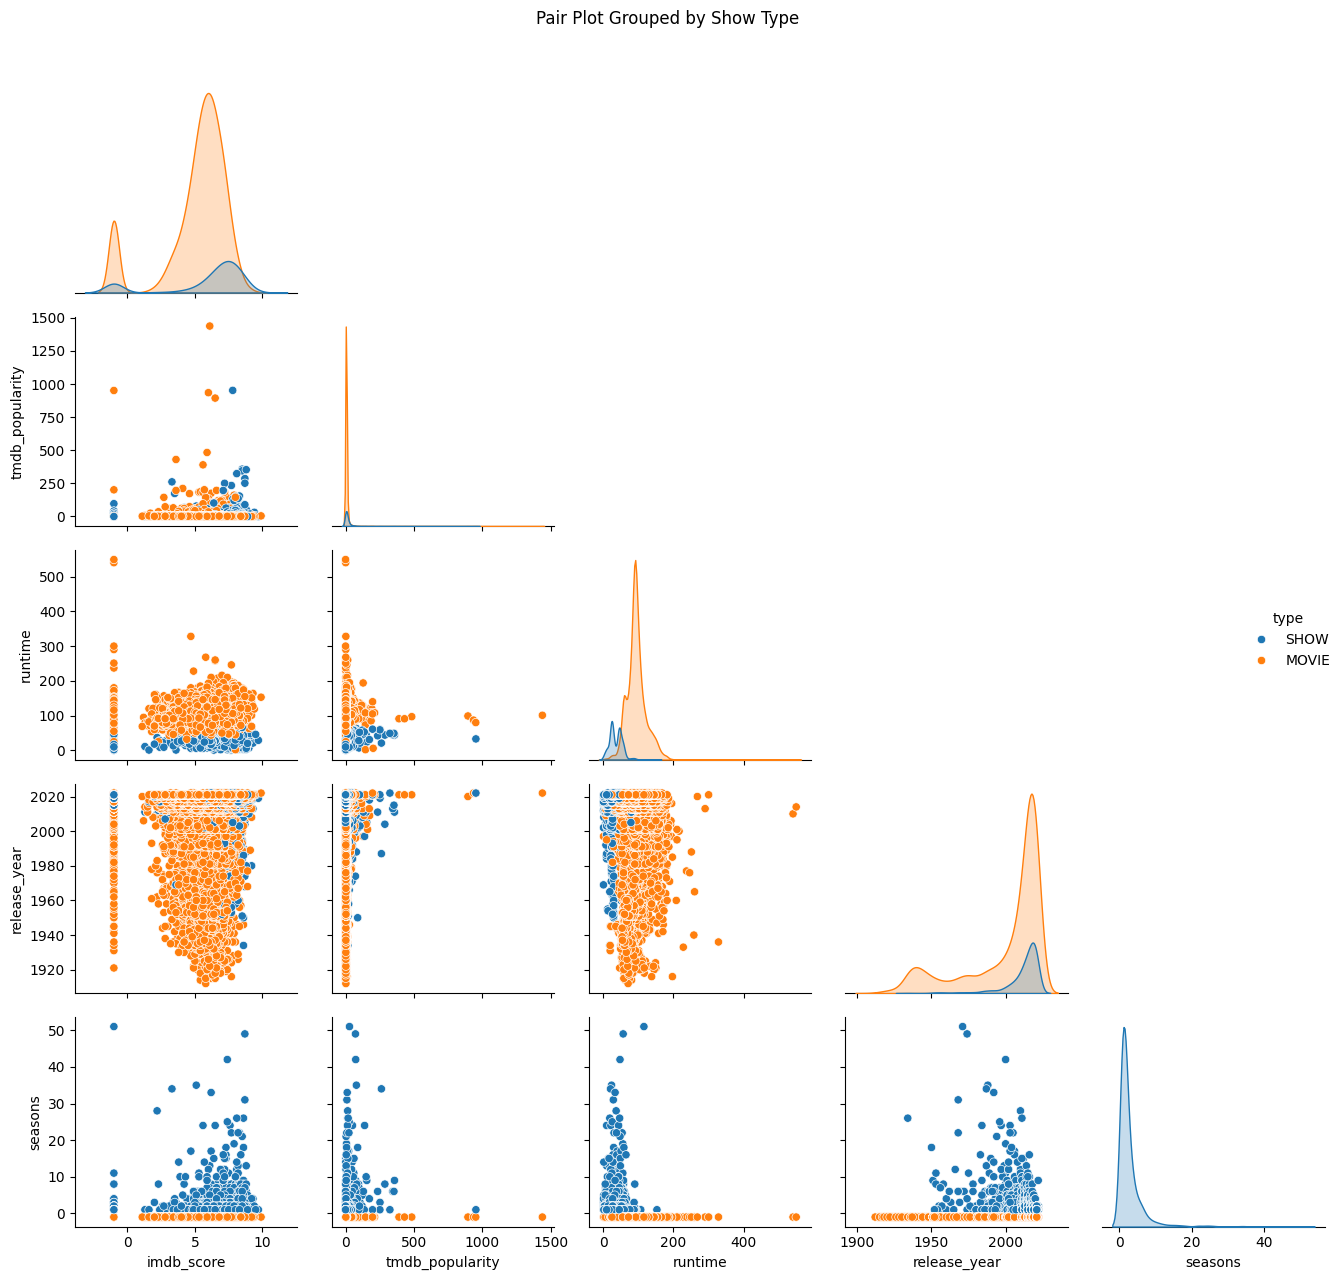

In [ ]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(titles[numeric_cols + ['type']], diag_kind='kde', corner=True, hue='type')
plt.suptitle('Pair Plot Grouped by Show Type', y=1.02)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart helps visually compare how key numeric features (IMDb score, popularity, runtime, release year, seasons) interact—while separating trends for TV shows and movies. It reveals structural differences and unique business levers for each format.

##### 2. What is/are the insight(s) found from the chart?

* TV shows and movies form distinct clusters: shows typically have more seasons, lower runtime per item, and sometimes unique release patterns.

* Movies dominate the catalog with a wide range of runtimes and popularity concentrations. Shows, meanwhile, are visually separate in season count and also have shorter runtimes.

* There is no obvious correlation between popularity and score, but you might spot specific outlier patterns unique to either movies or shows.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?


To achieve the business goals, the platform should use these insights to make content easier to discover, higher quality, and better aligned with what viewers want.​

1. Fix and enrich metadata

* Clean up missing or “Unknown” age certifications, genres, and countries so every title is correctly tagged and easy to filter or restrict for families.​

* Standardize metadata across regions to improve search, recommendations, and compliance everywhere.​

2. Use data to drive recommendations

* Feed IMDb scores, popularity, and viewing patterns into a stronger recommendation system so users see relevant movies and shows quickly instead of scrolling for long.​

* Promote a mix of proven hits and high‑rated “hidden gems” to increase watch time and keep users engaged.​

3. Optimize the catalog mix

* Reduce over‑reliance on a few countries or formats by investing more in high‑performing regions, genres, and directors identified in the analysis.​

* Grow the TV show and multi‑season offering where it makes sense, since these drive repeat visits and long‑term retention.​

4. Make it a continuous feedback loop

* Turn these dashboards (ratings by country, genre, director, runtime, etc.) into a regular input for acquisition, marketing, and release planning.​

* Experiment with different layouts, carousels, and campaigns, and use retention and engagement metrics to keep refining both content decisions and the product experience.

# **Conclusion**

To conclude this project, I thoroughly cleaned, merged, and analyzed the Amazon Prime Video dataset. Through advanced visualizations and deep dives, I discovered the most critical issues and growth opportunities: missing metadata, rating patterns, regional gaps, and the influence of top creators. My recommendations guided how to improve content discovery, diversify the catalog, and use viewer data to drive business decisions. With these insights, the client now has a clear, actionable plan to optimize their streaming platform and keep users engaged and satisfied for the long term.